In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import MiniBatchKMeans, KMeans, AgglomerativeClustering, AffinityPropagation, Birch, DBSCAN, MeanShift, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import OPTICS
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score, adjusted_rand_score, homogeneity_completeness_v_measure
import warnings as wr #Ignores the warnings
wr.filterwarnings('ignore')

In [33]:
df=pd.read_csv("Crop_recommendation.csv")

In [34]:
df.head()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label,Unnamed: 8,Unnamed: 9
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,NaN,NaN
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,NaN,NaN
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,NaN,NaN
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,NaN,NaN
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,NaN,NaN


In [35]:
df.isnull()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label,Unnamed: 8,Unnamed: 9
0,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...
2195,False,False,False,False,False,False,False,False,True,True
2196,False,False,False,False,False,False,False,False,True,True
2197,False,False,False,False,False,False,False,False,True,True
2198,False,False,False,False,False,False,False,False,True,True


In [36]:
df.isnull().sum()

Nitrogen          0
phosphorus        0
potassium         0
temperature       0
humidity          0
ph                0
rainfall          0
label             0
Unnamed: 8     2200
Unnamed: 9     2200
dtype: int64

In [37]:
df=df.dropna(axis=1)

In [38]:
df

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [39]:
df.describe()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [40]:
train, test = train_test_split(df, test_size=0.2, random_state=42)
X_train = train[['Nitrogen', 'phosphorus', 'potassium', 'temperature', 'humidity', 'ph', 'rainfall']].values
X_test = test[['Nitrogen', 'phosphorus', 'potassium', 'temperature', 'humidity', 'ph', 'rainfall']].values
target = train['label']

In [41]:
# MiniBatchKMeans
mini_batch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
mini_batch_kmeans.fit(X_train)

MiniBatchKMeans(n_clusters=5, random_state=42)

In [42]:
# KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_train)

KMeans(n_clusters=5, random_state=42)

In [43]:
# AgglomerativeClustering
agglomerative = AgglomerativeClustering(n_clusters=5)
agglomerative.fit(X_train)

AgglomerativeClustering(n_clusters=5)

In [44]:
# AffinityPropagation
affinity_propagation = AffinityPropagation()
affinity_propagation.fit(X_train)

AffinityPropagation()

In [45]:
# Birch
birch = Birch(n_clusters=5)
birch.fit(X_train)

Birch(n_clusters=5)

In [46]:
# DBSCAN
dbscan = DBSCAN()
dbscan.fit(X_train)

DBSCAN()

In [47]:
# MeanShift
mean_shift = MeanShift()
mean_shift.fit(X_train)

MeanShift()

In [17]:
# SpectralClustering
spectral_clustering = SpectralClustering(n_clusters=5, random_state=42)
spectral_clustering.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:393: UserWarning: Exited at iteration 168 with accuracies 
[3.66082342e-15 2.07760736e-05 1.42376730e-05 2.03805669e-05
 5.19939067e-05 2.40275609e-05]
not reaching the requested tolerance 2.6226043701171875e-05.
Use iteration 138 instead with accuracy 
1.915155369337418e-05.

  _, diffusion_map = lobpcg(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:393: UserWarning: Exited postprocessing with accuracies 
[1.18534300e-15 2.07303497e-05 1.56798612e-05 1.79976679e-05
 2.33353322e-05 3.71661112e-05]
not reaching the requested tolerance 2.6226043701171875e-05.
  _, diffusion_map = lobpcg(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:420: ConvergenceWarning: Number of d

SpectralClustering(n_clusters=5, random_state=42)

In [18]:
# GaussianMixture
gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(X_train)

GaussianMixture(n_components=5, random_state=42)

In [19]:
# OPTICS
optics = OPTICS()
optics.fit(X_train)

OPTICS()

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [10.0, 10.0, 32.5, 32.5],
  [55.0, 55.0, 65.0, 65.0],
  [75.0, 75.0, 85.0, 85.0],
  [60.0, 60.0, 80.0, 80.0],
  [105.0, 105.0, 115.0, 115.0],
  [125.0, 125.0, 135.0, 135.0],
  [110.0, 110.0, 130.0, 130.0],
  [95.0, 95.0, 120.0, 120.0],
  [70.0, 70.0, 107.5, 107.5],
  [21.25, 21.25, 88.75, 88.75],
  [155.0, 155.0, 165.0, 165.0],
  [175.0, 175.0, 185.0, 185.0],
  [160.0, 160.0, 180.0, 180.0],
  [145.0, 145.0, 170.0, 170.0],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [202.5, 202.5, 232.5, 232.5],
  [157.5, 157.5, 217.5, 217.5],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [255.0, 255.0, 272.5, 272.5],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [365.0, 365.0, 375.0, 375.0],
  [355.0, 355.0, 370.0, 370.0],


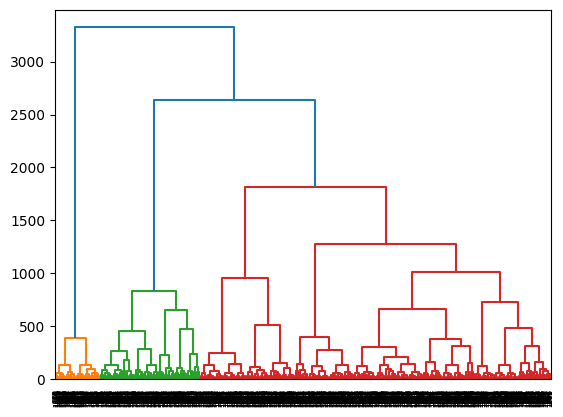

In [20]:
# Hierarchical clustering (linkage and dendrogram)
linkage_matrix = linkage(X_train, method='ward')
dendrogram(linkage_matrix)

In [21]:
#MiniBatchKMeans

# Get the predicted cluster labels for the training data
train_cluster_labels = mini_batch_kmeans.labels_

# Compute evaluation metrics
silhouette_avg = silhouette_score(X_train, train_cluster_labels)
ari = adjusted_rand_score(target, train_cluster_labels)
homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(target, train_cluster_labels)

# Print evaluation metrics
print("Silhouette Score:", silhouette_avg)
print("Adjusted Rand Index:", ari)
print("Homogeneity:", homogeneity)
print("Completeness:", completeness)
print("V-measure:", v_measure)


Silhouette Score: 0.39284654635569805
Adjusted Rand Index: 0.1748657408252106
Homogeneity: 0.40032462178571476
Completeness: 0.8738497770730168
V-measure: 0.5490984308233174


In [22]:
#KMeans

# Get the predicted cluster labels for the training data
train_cluster_labels = kmeans.labels_

# Compute evaluation metrics
silhouette_avg = silhouette_score(X_train, train_cluster_labels)
ari = adjusted_rand_score(target, train_cluster_labels)
homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(target, train_cluster_labels)

# Print evaluation metrics
print("Silhouette Score:", silhouette_avg)
print("Adjusted Rand Index:", ari)
print("Homogeneity:", homogeneity)
print("Completeness:", completeness)
print("V-measure:", v_measure)


Silhouette Score: 0.3880142086658608
Adjusted Rand Index: 0.23887132731300023
Homogeneity: 0.4318346434455172
Completeness: 0.8579334632429804
V-measure: 0.5744992286260481


In [23]:
# AgglomerativeClustering

# Get the predicted cluster labels for the training data
train_cluster_labels = agglomerative.labels_

# Compute evaluation metrics
silhouette_avg = silhouette_score(X_train, train_cluster_labels)
ari = adjusted_rand_score(target, train_cluster_labels)
homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(target, train_cluster_labels)

# Print evaluation metrics
print("Silhouette Score:", silhouette_avg)
print("Adjusted Rand Index:", ari)
print("Homogeneity:", homogeneity)
print("Completeness:", completeness)
print("V-measure:", v_measure)


Silhouette Score: 0.36990069163203215
Adjusted Rand Index: 0.21771191100971643
Homogeneity: 0.4446816673547052
Completeness: 0.9293280011722735
V-measure: 0.6015316115260477


In [24]:
#AffinityPropagation

# Get the predicted cluster labels for the training data
train_cluster_labels = affinity_propagation.labels_

# Compute evaluation metrics
silhouette_avg = silhouette_score(X_train, train_cluster_labels)
ari = adjusted_rand_score(target, train_cluster_labels)
homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(target, train_cluster_labels)

# Print evaluation metrics
print("Silhouette Score:", silhouette_avg)
print("Adjusted Rand Index:", ari)
print("Homogeneity:", homogeneity)
print("Completeness:", completeness)
print("V-measure:", v_measure)


Silhouette Score: 0.368500876146879
Adjusted Rand Index: 0.7451747561934313
Homogeneity: 0.9429264229511191
Completeness: 0.8386322623658429
V-measure: 0.8877266023749769


In [25]:
#Birch

# Get the predicted cluster labels for the training data
train_cluster_labels = birch.labels_

# Compute evaluation metrics
silhouette_avg = silhouette_score(X_train, train_cluster_labels)
ari = adjusted_rand_score(target, train_cluster_labels)
homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(target, train_cluster_labels)

# Print evaluation metrics
print("Silhouette Score:", silhouette_avg)
print("Adjusted Rand Index:", ari)
print("Homogeneity:", homogeneity)
print("Completeness:", completeness)
print("V-measure:", v_measure)

Silhouette Score: 0.36990069163203215
Adjusted Rand Index: 0.21771191100971643
Homogeneity: 0.4446816673547052
Completeness: 0.9293280011722735
V-measure: 0.6015316115260477


In [26]:
#DBSCAN

# Get the predicted cluster labels for the training data
train_cluster_labels = dbscan.labels_

# Compute evaluation metrics (silhouette score is not applicable to DBSCAN)
ari = adjusted_rand_score(target, train_cluster_labels)
homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(target, train_cluster_labels)

# Print evaluation metrics
print("Adjusted Rand Index:", ari)
print("Homogeneity:", homogeneity)
print("Completeness:", completeness)
print("V-measure:", v_measure)


Adjusted Rand Index: 0.0
Homogeneity: 0.0
Completeness: 1.0
V-measure: 0.0


In [27]:
#MeanShift

# Get the predicted cluster labels for the training data
train_cluster_labels = mean_shift.labels_

# Compute evaluation metrics
silhouette_avg = silhouette_score(X_train, train_cluster_labels)
ari = adjusted_rand_score(target, train_cluster_labels)
homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(target, train_cluster_labels)

# Print evaluation metrics
print("Silhouette Score:", silhouette_avg)
print("Adjusted Rand Index:", ari)
print("Homogeneity:", homogeneity)
print("Completeness:", completeness)
print("V-measure:", v_measure)


Silhouette Score: 0.5467470270493778
Adjusted Rand Index: 0.01888084657755322
Homogeneity: 0.09985647799386856
Completeness: 1.0000000000000004
V-measure: 0.18158092440571183


In [28]:
#SpectralClustering

# Get the predicted cluster labels for the training data
train_cluster_labels = spectral_clustering.labels_

# Compute evaluation metrics
silhouette_avg = silhouette_score(X_train, train_cluster_labels)
ari = adjusted_rand_score(target, train_cluster_labels)
homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(target, train_cluster_labels)

# Print evaluation metrics
print("Silhouette Score:", silhouette_avg)
print("Adjusted Rand Index:", ari)
print("Homogeneity:", homogeneity)
print("Completeness:", completeness)
print("V-measure:", v_measure)


Silhouette Score: -0.270589272008577
Adjusted Rand Index: 8.585910623203282e-06
Homogeneity: 0.001153041174756407
Completeness: 0.3700462454109585
V-measure: 0.002298919060149236


In [29]:
#GaussianMixture

# Get the predicted cluster labels for the training data
train_cluster_labels = gmm.predict(X_train)

# Compute evaluation metrics
silhouette_avg = silhouette_score(X_train, train_cluster_labels)
ari = adjusted_rand_score(target, train_cluster_labels)
homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(target, train_cluster_labels)

# Print evaluation metrics
print("Silhouette Score:", silhouette_avg)
print("Adjusted Rand Index:", ari)
print("Homogeneity:", homogeneity)
print("Completeness:", completeness)
print("V-measure:", v_measure)

Silhouette Score: 0.34221671586215324
Adjusted Rand Index: 0.28478777409763506
Homogeneity: 0.4911732977694198
Completeness: 0.9693748667398314
V-measure: 0.6519895223467367


In [30]:
#OPTICS

# Get the predicted cluster labels for the training data
train_cluster_labels = optics.labels_

# Compute evaluation metrics (silhouette score is not applicable to OPTICS)
ari = adjusted_rand_score(target, train_cluster_labels)
homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(target, train_cluster_labels)

# Print evaluation metrics
print("Adjusted Rand Index:", ari)
print("Homogeneity:", homogeneity)
print("Completeness:", completeness)
print("V-measure:", v_measure)

Adjusted Rand Index: 0.022125785779513074
Homogeneity: 0.332676057224183
Completeness: 0.5552951223151325
V-measure: 0.4160797020089311


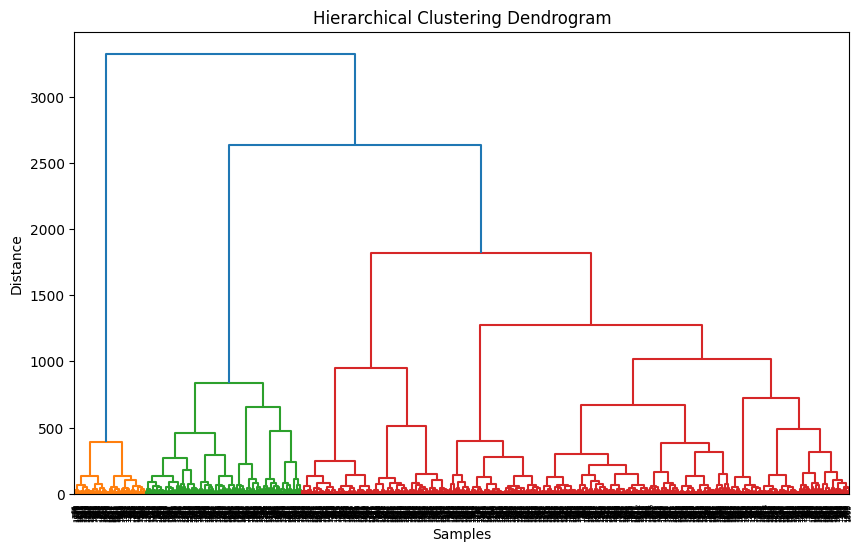

Silhouette Score: 0.24939705130709375
Adjusted Rand Index: 0.30928048957013204
Homogeneity: 0.9864190436604117
Completeness: 0.6413153113568584
V-measure: 0.7772836325085729


In [31]:
from scipy.cluster.hierarchy import fcluster

# hierarchical clustering

# Plotting the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Set the desired number of clusters based on the dendrogram visualization
threshold = 50
train_cluster_labels = fcluster(linkage_matrix, threshold, criterion='distance')

# Compute evaluation metrics
silhouette_avg = silhouette_score(X_train, train_cluster_labels)
ari = adjusted_rand_score(target, train_cluster_labels)
homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(target, train_cluster_labels)

# Print evaluation metrics
print("Silhouette Score:", silhouette_avg)
print("Adjusted Rand Index:", ari)
print("Homogeneity:", homogeneity)
print("Completeness:", completeness)
print("V-measure:", v_measure)
